# Function Transformer:
We use the funtion transformer to convert the data that to look like the normal distribution, as machine learning use the statical technique so that normal distribution is good for the model accuracy.
* Log transform
* square and square root Transform
* Reciprocal Transform

We apply Tranformation to the titanic data set and see the accuracy before and after applying the accuracy of the model for this data.

In [175]:
import pandas as pd

In [176]:
df = pd.read_csv('/content/titanic (1).csv')

In [177]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [178]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [179]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [180]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [181]:
# import the column transformer , one hot encoder , simple imputer , standard scaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [182]:
x.isnull().sum()

,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [183]:
# prompt: impute the null value in age with mean and in embarked with most frequesnt

# Impute 'Age' with the mean
imputer_age = SimpleImputer(strategy='mean')
x['Age'] = imputer_age.fit_transform(x[['Age']])[:, 0]

# Impute 'Embarked' with the most frequent value
imputer_embarked = SimpleImputer(strategy='most_frequent')
x['Embarked'] = imputer_embarked.fit_transform(x[['Embarked']])[:, 0]

In [184]:
# prompt: encode the sex and embarked using the pd.get dummies

# Create dummy variables for 'Sex' and 'Embarked'
x = pd.get_dummies(x, columns=['Sex', 'Embarked'], drop_first=True)
x.replace({True:1 , False:0}, inplace=True)
x.head()

<ipython-input-184-c7a427fc15c3>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.replace({True:1 , False:0}, inplace=True)


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [186]:
# standard scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [187]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

y_pred = logreg_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy}")

Accuracy of Logistic Regression: 0.8100558659217877


# now we apply the function transform to the numerical data

In [188]:
x.head(1)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.25,1,0,1


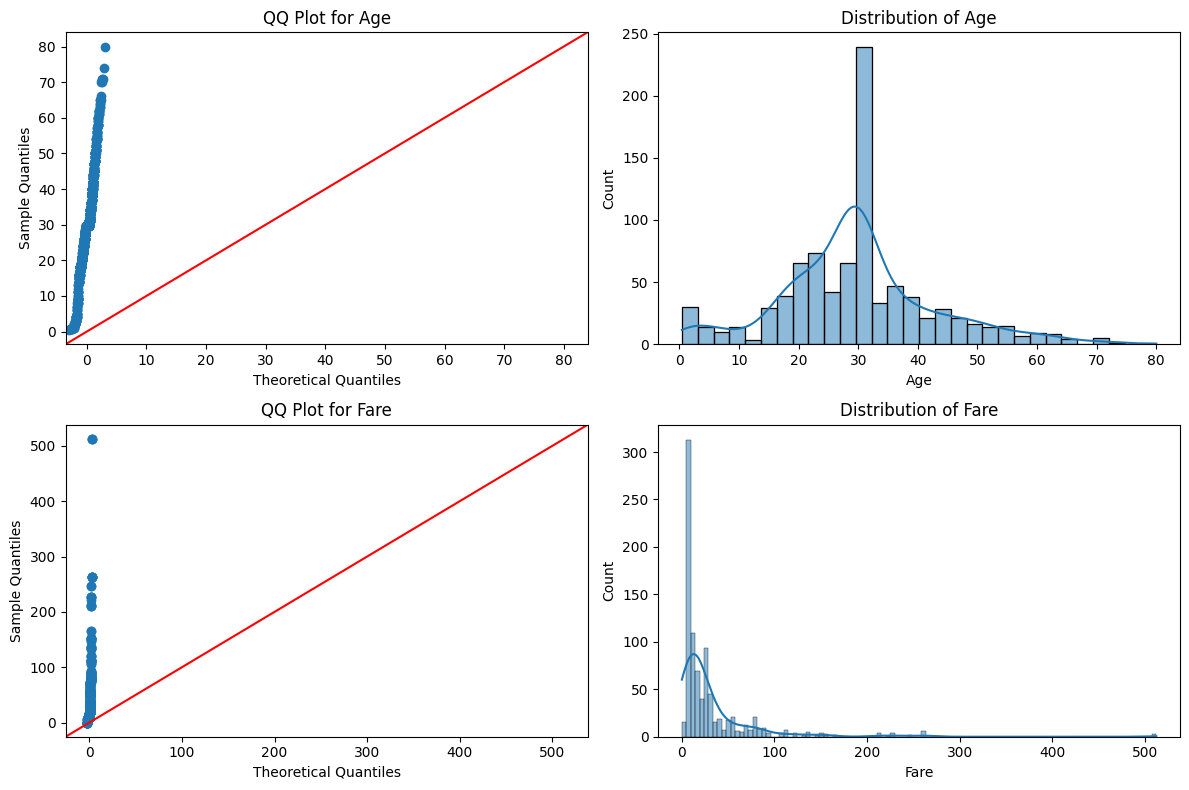

In [189]:
# prompt: plot the qq graph for the age and fare also distribution graph side by side

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Assuming 'x' is your DataFrame after preprocessing
# Extract 'Age' and 'Fare' columns
age = x['Age']
fare = x['Fare']

# Create subplots for QQ plots and distribution plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# QQ Plot for Age
sm.qqplot(age, line='45', ax=axes[0, 0])
axes[0, 0].set_title('QQ Plot for Age')

# Distribution plot for Age
sns.histplot(age, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Age')

# QQ Plot for Fare
sm.qqplot(fare, line='45', ax=axes[1, 0])
axes[1, 0].set_title('QQ Plot for Fare')

# Distribution plot for Fare
sns.histplot(fare, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Fare')

plt.tight_layout()
plt.show()

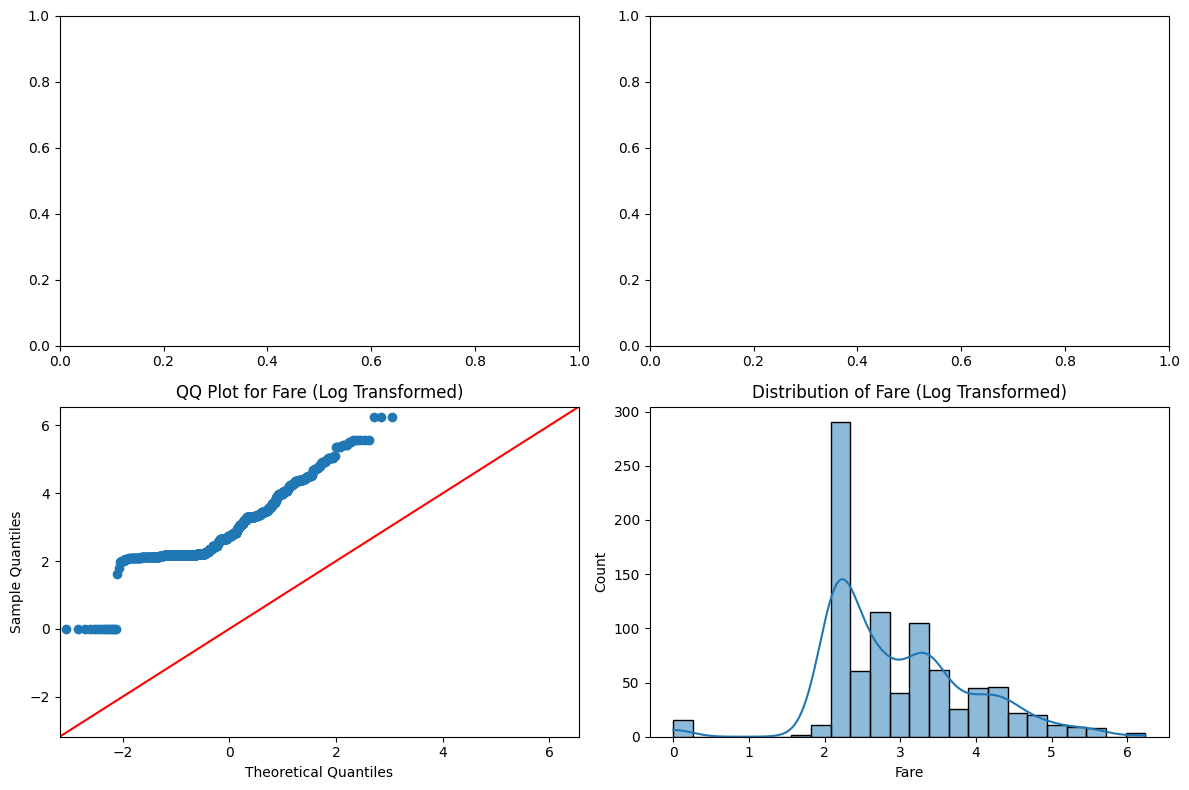

In [190]:

import numpy as np

# Apply log transformation to 'Fare'
x['Fare'] = np.log1p(x['Fare'])  # Use log1p to handle zero values

# Create subplots for QQ plots and distribution plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# QQ Plot for Fare (log transformed)
sm.qqplot(x['Fare'], line='45', ax=axes[1, 0])
axes[1, 0].set_title('QQ Plot for Fare (Log Transformed)')

# Distribution plot for Fare (log transformed)
sns.histplot(x['Fare'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Fare (Log Transformed)')

plt.tight_layout()
plt.show()

In [191]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x,y,test_size=0.2,random_state=42)

In [192]:
lf = LogisticRegression()
lf.fit(x_train1,y_train1)
y_pred1 = lf.predict(x_test1)
accuracy_score(y_test1,y_pred1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7988826815642458